In [23]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'] = df['job_posted_date'].dt.date
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df_Irl =df[df['job_country']=='Ireland']

In [25]:
df_skills = df_Irl.explode('job_skills')
df_skills_count = df_skills[['job_title_short','job_skills']].value_counts()
df_skills_count = df_skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count',ascending= False, inplace= True)
df_skills_count


,job_title_short,job_skills,skills_count
0,Data Analyst,sql,1227
1,Data Engineer,sql,1024
2,Data Engineer,python,956
3,Data Analyst,excel,919
4,Data Scientist,python,759
...,...,...,...
1170,Senior Data Analyst,spreadsheet,1
1171,Senior Data Analyst,spss,1
1172,Machine Learning Engineer,bigquery,1
1173,Machine Learning Engineer,blazor,1


In [26]:
job_titles = df_skills_count['job_title_short'].unique()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

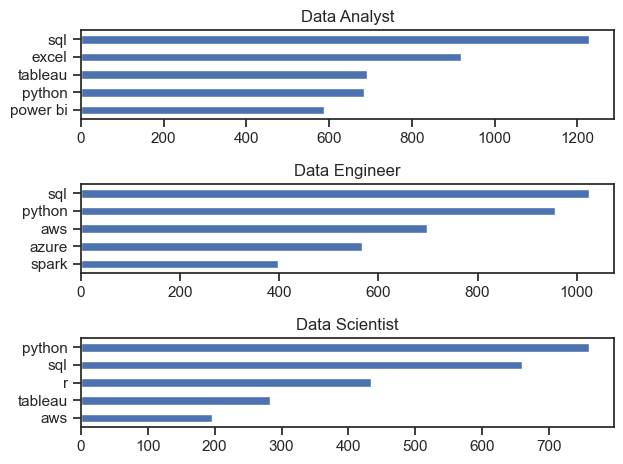

In [27]:
fig, ax = plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skills_count',ax=ax[i],title=job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
plt.tight_layout()


In [28]:
df_job_title_count = df_Irl['job_title_short'].value_counts().reset_index(name= 'jobs_total')
df_skills_perc = df_skills_count.merge(how='left',on='job_title_short',right=df_job_title_count)

In [29]:
df_skills_perc['skill_perc'] = (df_skills_perc['skills_count'] / df_skills_perc['jobs_total']) * 100
df_skills_percent = df_skills_perc.sort_values(by='skill_perc', ascending= False)
df_skills_perc


,job_title_short,job_skills,skills_count,jobs_total,skill_perc
0,Data Analyst,sql,1227,2756,44.521045
1,Data Engineer,sql,1024,1925,53.194805
2,Data Engineer,python,956,1925,49.662338
3,Data Analyst,excel,919,2756,33.345428
4,Data Scientist,python,759,1435,52.891986
...,...,...,...,...,...
1218,Senior Data Analyst,spreadsheet,1,641,0.156006
1219,Senior Data Analyst,spss,1,641,0.156006
1220,Machine Learning Engineer,bigquery,1,256,0.390625
1221,Machine Learning Engineer,blazor,1,256,0.390625


In [30]:
# make it with percentage and pretty, fix github

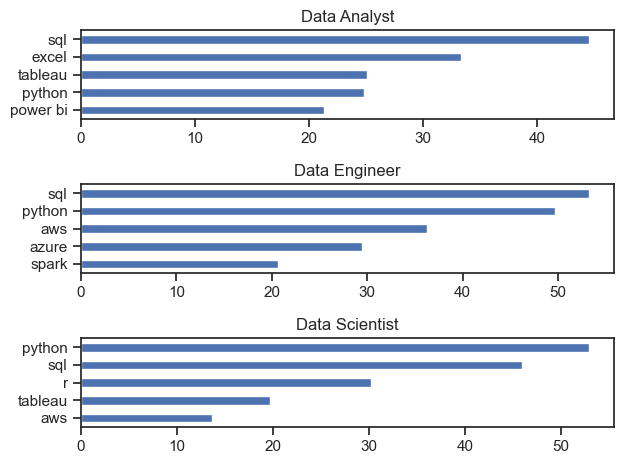

In [31]:
fig, ax = plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_perc',ax=ax[i],title=job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
plt.tight_layout()


C:\Users\user\AppData\Local\Temp\ipykernel_16092\2896795404.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().set_visible(False)
C:\Users\user\AppData\Local\Temp\ipykernel_16092\2896795404.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().set_visible(False)
C:\Users\user\AppData\Local\Temp\ipykernel_16092\2896795404.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().set_visible(False)


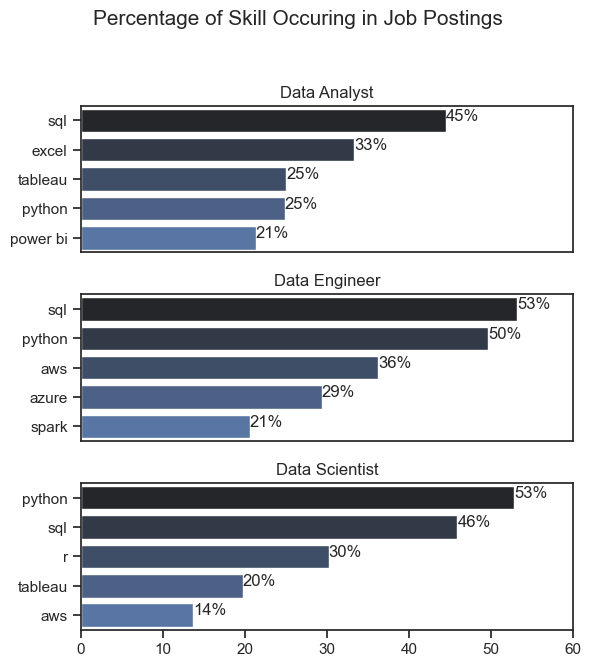

In [43]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)  
    sns.barplot(data = df_plot, x='skill_perc',y='job_skills',ax=ax[i], hue='job_skills', palette='dark:b')
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0,60)
    ax[i].set_xlabel('')
    sns.set_style('ticks')
    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v,n,f'{v:.0f}%')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([]) 

fig.suptitle('Percentage of Skill Occuring in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
fig.set_size_inches(6,7)
plt.show()

In [39]:
len(job_titles)

3